<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Problemas_de_Sturm_Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRUZ OLIVARES ROBERTO ULISES

#Problemas de Sturm-Liouville
                           
**Como resolverlos?**

Idealmente lo funcional seria encontrar una libreria que analice por nosotros la k para poder determinar la **SOLUCION NO TRIVIAL**, pero no existe una funcion tal cual que lo haga, necesariamente nostros necesitamos saber el caso que nos da esta solucion no trivial. Para esta ocasion para poder determinar el caso de k:


1.   $k>0$
2.   $k=0$
3.   $k<0$

Plantemos el problema:
$$
X'' + kX = 0,   X(0)=X(1)=0
$$
el cual lo podemos reducir a:
$$
r^2+0*r+k=0
$$
es decir tenemos 3 casos posibles dependiendo de nuestra k


1.   $w^2=k>0$
$$
X=A*cos(w*t) + B * sen(w*t)
$$
2.   $k=0$
$$
X=0
$$
3.   $-w^2=k<0$
$$
X= C_1*e^{w_1 t} + C_2*e^{w_2 t}
$$
Para evitarnos lo anterior, lo que se propuso es resolver la ecuacion numericamente y ver si graficamente se parace una funcion de exponenciales, senos o cosenos o combinacion de estos, despues de numericamente deducir el caso para la k se resolvio.


# 1. **Analizar numericamente la k para determinar el caso de:**
$$
X'' + kX = 0,   X(0)=X(1)=0
$$
Primero lo planteamos como un sistema de ecuaciones:
$$
X_1=X
$$
$$
X_2=X'
$$
$$
X_1'=X_2
$$
$$
X_2'=-k*X_1
$$

In [15]:
# Importamos librerias necesarias
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Definimos la funcion
def fun(t, X, p):
    k = p[0]
    return np.vstack((X[1], -k * X[0]))   # Planteado como sistema de ecuaciones

$$
X_a[0]=X(0)
$$
$$
X_a[1] = X'(0)
$$
$$
X_b[0] = X(1)
$$

In [16]:
# Definimos las Condiciones Iniciales
def CI(Xa, Xb, p):
    k = p[0]
    return np.array([Xa[0], Xb[0], Xa[1] - k]) # Este ultimo parametro es para ajustar las graficas con k


**Graficando:**

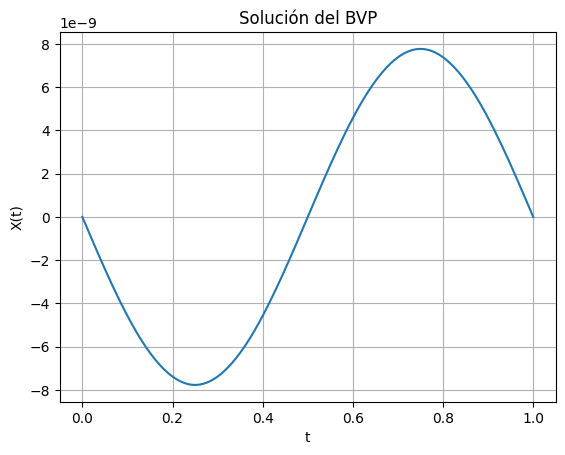

In [17]:
t = np.linspace(0, 1, 5)
X = np.zeros((2, t.size))
X[0, 1] = 1
X[0, 3] = -1

sol = solve_bvp(fun, CI, t, X, p=[6])
t_plot = np.linspace(0, 1, 200)
X_plot = sol.sol(t_plot)[0]

plt.plot(t_plot, X_plot)
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("Solución del BVP")
plt.grid(True)
plt.show()

# **2. Determinado el caso, resolvemos la EDO:**

In [18]:
import sympy as sp

# Variables simbolicas
x, r = sp.symbols('x r', real=True)
k = sp.symbols('k', real=True)
C1, C2 = sp.symbols('C1 C2')

# Ecuacion caracteristica: r^2 + k = 0
char_eq = sp.Eq(r**2 + k, 0)
roots = sp.solve(char_eq, r)

# Dependiendo de las raices, construimos la solucion general automaticamente
r1, r2 = roots[0], roots[1]

# Solucion general basada en las raices
# Si son complejas: usaremos sin y cos
if sp.im(r1) != 0:
    sqrt_k = sp.sqrt(k)
    X = C1 * sp.cos(sqrt_k * x) + C2 * sp.sin(sqrt_k * x)
elif r1 == r2:
    X = C1 * sp.exp(r1 * x) + C2 * x * sp.exp(r1 * x)
else:
    X = C1 * sp.exp(r1 * x) + C2 * sp.exp(r2 * x)

# Aplicar condiciones de frontera: X(0) = 0 y X(1) = 0
X0 = X.subs(x, 0)
X1 = X.subs(x, 1)

# Resolver sistema homogeneo
eq1 = sp.Eq(X0, 0)
eq2 = sp.Eq(X1, 0)

# Eliminamos C1 usando la primera ecuacion
sol_C1 = sp.solve(eq1, C1)
if sol_C1:
    eq2 = eq2.subs(C1, sol_C1[0])

# Simplificar segunda condicion
simplified = sp.simplify(eq2.lhs)

# Factorizamos para buscar valores de k que dan soluciones no triviales
print("Condicion para que exista solucion no trivial:")
sp.pprint(simplified)

# Encontrar valores de k que anulen la expresion (sin que C2 = 0)
k_values = sp.solve(simplified, k)

print("\nValores de k que permiten soluciones no triviales:")
for val in k_values:
    sp.pprint(val)


Condición para que exista solución no trivial:
C₂⋅sin(√k)

Valores de k que permiten soluciones no triviales:
0
 2
π 


# 1. **Analizar numericamente la k para determinar el caso de:**
$$
X'' + kX = 0,   X'(0)=X'(1)=0
$$

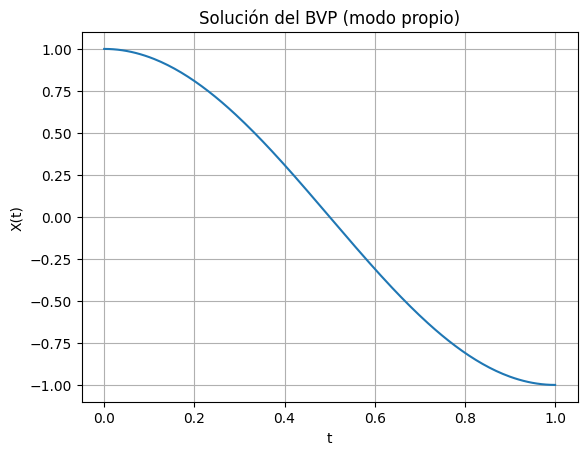

In [19]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Sistema de EDOs: X'' + kX = 0 se reescribe como:
# X[0] = X    y    X[1] = X'
# Con:   X[0]' = X[1]     y     X[1]' = -k*X[0]
def fun(t, X, p):
    k = p[0]
    return np.vstack((X[1], -k * X[0]))  # Representa el sistema

# Condiciones de frontera:
# Se imponen:  X'(0)=0, X'(1)=0, y X(0)=1 (para evitar la solución trivial)
def CI(Xa, Xb, p):
    return np.array([Xa[1], Xb[1], Xa[0] - 1])


t = np.linspace(0, 1, 5)
X = np.zeros((2, t.size))
X[0, 1] = 1
X[0, 3] = -1


sol = solve_bvp(fun, CI, t, X, p=[10])  # p=[10] es la suposición inicial para el parametro k


t_plot = np.linspace(0, 1, 200)
X_plot = sol.sol(t_plot)[0]  # Se obtiene X(t) de la solución

# Graficar la solucion
plt.plot(t_plot, X_plot)
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("Solucion del BVP (modo propio)")
plt.grid(True)
plt.show()


# **Resolucion de la EDO**

In [20]:
import sympy as sp

# Variables simbolicas
x, r = sp.symbols('x r', real=True)
k = sp.symbols('k', real=True)
C1, C2 = sp.symbols('C1 C2')

# Ecuación caracteristica
char_eq = sp.Eq(r**2 + k, 0)
roots = sp.solve(char_eq, r)
r1, r2 = roots

# (raices complejas)
if sp.im(r1) != 0:
    sqrt_k = sp.sqrt(k)
    X = C1 * sp.cos(sqrt_k * x) + C2 * sp.sin(sqrt_k * x)
elif r1 == r2:
    X = C1 * sp.exp(r1 * x) + C2 * x * sp.exp(r1 * x)
else:
    X = C1 * sp.exp(r1 * x) + C2 * sp.exp(r2 * x)

# Derivada de la solucion
X_deriv = sp.diff(X, x)

# Aplicar condiciones de frontera: X'(0) = 0, X'(1) = 0
X0p = X_deriv.subs(x, 0)
X1p = X_deriv.subs(x, 1)

# Resolver X'(0) = 0 para C2
eq1 = sp.Eq(X0p, 0)
sol_C2 = sp.solve(eq1, C2)

if sol_C2:
    # Sustituir C2 en la segunda ecuacion
    eq2 = sp.Eq(X1p.subs(C2, sol_C2[0]), 0)
    simplified = sp.simplify(eq2.lhs)

    print(" Condicion para que exista solucion no trivial:")
    sp.pprint(simplified)

    # Resolver para valores de k
    k_values = sp.solve(simplified, k)
    print("\n Valores de k que permiten soluciones no triviales:")
    for val in k_values:
        sp.pprint(val)

    # Mostrar la forma final de la solucion
    print("\n Solución general deducida:")
    X_final = X.subs(C2, sol_C2[0])
    sp.pprint(X_final)
else:
    print("  Solo existe la solucion trivial.")


 Condición para que exista solución no trivial:
-C₁⋅√k⋅sin(√k)

 Valores de k que permiten soluciones no triviales:
0
 2
π 

 Solución general deducida:
C₁⋅cos(√k⋅x)
